In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

**CREATING TEST DATA**

In [29]:

X = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = 5 * X + 10

**PLOTTING THE DATA**

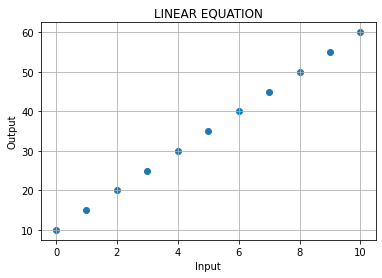

In [30]:

plt.scatter(X, y)
plt.grid()
plt.ylabel("Output")
plt.xlabel("Input") 
plt.title("LINEAR EQUATION") 
plt.show()


**CREATING NEURAL NETWORK**

In [31]:

model = Sequential()
model.add(Dense(1,  input_dim = 1, activation = 'linear'))
adam = Adam(learning_rate=0.2)
model.compile(optimizer = adam,
              loss = 'mse', 
              metrics = ['mse'])

In [32]:
model.get_weights()

[array([[-0.59327817]], dtype=float32), array([0.], dtype=float32)]

**STORING SLOPE AND BIAS VALUES AT END OF EACH EPOCH**

In [33]:
slope_values = []
bias_values = []
class get_model_weights(Callback):
    def on_epoch_end(self, batch, logs):
        slope, bias = model.get_weights()
        slope_values.append(slope[0][0])
        bias_values.append(bias[0])
callback = get_model_weights()

In [34]:
model.fit(X, y, epochs = 300, 
          verbose = False, 
          callbacks=[callback])

**PLOTTING SLOPE VALUES**

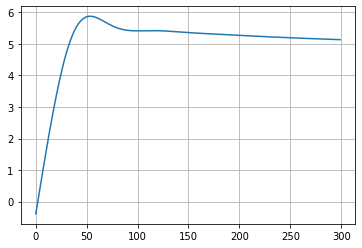

In [35]:
plt.plot(slope_values)
plt.grid()

**PLOTTING BIAS VALUES**

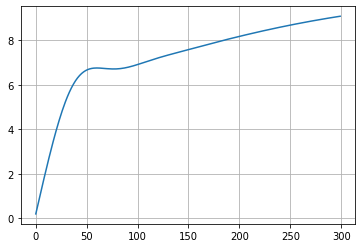

In [36]:
plt.plot(bias_values)
plt.grid()